In [1]:
import pandas as pd
import numpy as np

In [2]:
names2000 = pd.read_csv('yob2000.txt',names=['name', 'sex', 'births'])

In [3]:
names2000.head()

,name,sex,births
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697


In [4]:
names2000.groupby('sex').births.sum()

sex
F    1815110
M    1962969
Name: births, dtype: int64

In [5]:
years = range(2000,2018)
pieces = []
columns = ['name', 'sex', 'births']

for year in years :
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path,names = columns)
    frame['year'] = year
    
    pieces.append(frame)
    
#concat everything

names = pd.concat(pieces,ignore_index=False)
    

In [6]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591925 entries, 0 to 32468
Data columns (total 4 columns):
name      591925 non-null object
sex       591925 non-null object
births    591925 non-null int64
year      591925 non-null int64
dtypes: int64(2), object(2)
memory usage: 22.6+ MB


In [7]:
names.head()

,name,sex,births,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [8]:
total_births = names.pivot_table('births','year','sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
2000,1815110,1962969
2001,1799636,1941815
2002,1795741,1940301
2003,1825950,1974021
2004,1834856,1983505


In [9]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [10]:
names.head()

,name,sex,births,year,prop
0,Emily,F,25953,2000,0.014298
1,Hannah,F,23080,2000,0.012715
2,Madison,F,19967,2000,0.011000
3,Ashley,F,17997,2000,0.009915
4,Sarah,F,17697,2000,0.009750


In [11]:
#checking if prop has value = 1 ; allclose results  to True/False depending on value
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [12]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending  = False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [13]:
top1000.head()

name sex  births  year      prop
year sex                                       
2000 F   0    Emily   F   25953  2000  0.014298
         1   Hannah   F   23080  2000  0.012715
         2  Madison   F   19967  2000  0.011000
         3   Ashley   F   17997  2000  0.009915
         4    Sarah   F   17697  2000  0.009750

In [14]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36000 entries, (2000, F, 0) to (2017, M, 19311)
Data columns (total 5 columns):
name      36000 non-null object
sex       36000 non-null object
births    36000 non-null int64
year      36000 non-null int64
prop      36000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


In [15]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [16]:
total_births = top1000.pivot_table('births','year','name')
total_births.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Abagail,Abbey,Abbie,...,Zechariah,Zeke,Zelda,Zendaya,Zion,Zoe,Zoey,Zoie,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,1496.0,NaN,NaN,9553.0,NaN,222.0,660.0,432.0,...,269.0,NaN,NaN,NaN,1004.0,3785.0,691.0,320.0,NaN,NaN
2001,NaN,NaN,3352.0,NaN,NaN,9535.0,NaN,244.0,688.0,526.0,...,295.0,NaN,NaN,NaN,867.0,4644.0,822.0,439.0,NaN,NaN
2002,NaN,NaN,4778.0,NaN,NaN,9001.0,NaN,256.0,600.0,514.0,...,285.0,NaN,NaN,NaN,828.0,4886.0,1182.0,438.0,NaN,NaN
2003,NaN,NaN,3672.0,NaN,NaN,8865.0,NaN,276.0,625.0,536.0,...,280.0,NaN,NaN,NaN,878.0,5085.0,1469.0,449.0,NaN,NaN
2004,NaN,NaN,3488.0,NaN,NaN,8389.0,NaN,258.0,505.0,500.0,...,308.0,NaN,NaN,NaN,1007.0,5363.0,1622.0,515.0,NaN,NaN


In [17]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1336134a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd1314e2518>], dtype=object)

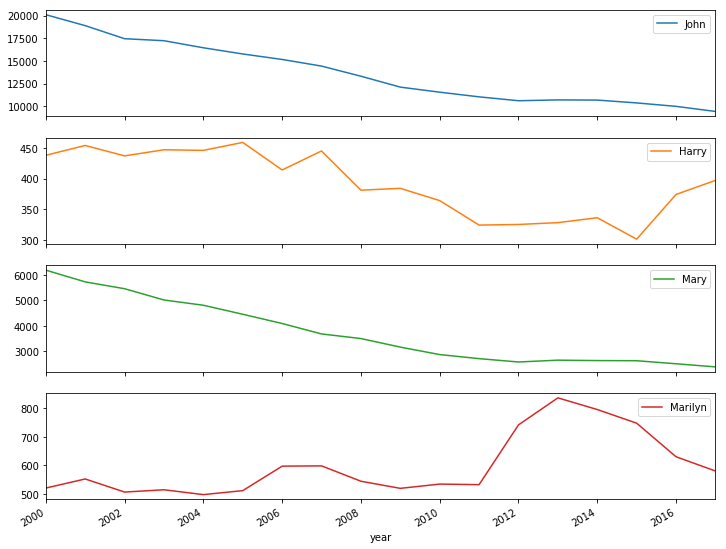

In [18]:
% matplotlib inline
subset.plot(subplots=True, figsize=(12, 10), grid=False)

In [19]:
table = top1000.pivot_table('prop','year','sex',aggfunc = sum)
table.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


sex,F,M
year,,
2000,0.791419,0.886961
2001,0.784094,0.882756
2002,0.780364,0.879743
2003,0.774809,0.876719
2004,0.767222,0.870043


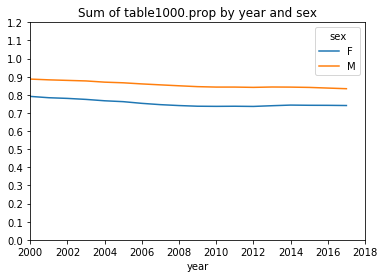

In [20]:
table.plot(title = 'Sum of table1000.prop by year and sex',
          yticks = np.linspace(0,1.2,13),xticks = range(2000,2020,2))

In [21]:
#extracting the last letter
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters

0        y
1        h
2        n
3        y
4        h
5        s
6        a
7        a
8        h
9        r
10       n
11       a
12       a
13       l
14       a
15       a
16       a
17       n
18       e
19       a
20       l
21       a
22       y
23       y
24       n
25       r
26       e
27       y
28       a
29       n
        ..
32439    r
32440    r
32441    i
32442    a
32443    e
32444    d
32445    h
32446    o
32447    k
32448    n
32449    n
32450    n
32451    r
32452    a
32453    n
32454    g
32455    i
32456    n
32457    n
32458    n
32459    r
32460    y
32461    l
32462    m
32463    r
32464    i
32465    m
32466    n
32467    s
32468    e
Name: name, Length: 591925, dtype: object

In [23]:
last_letters.name = 'last_letter'

In [25]:
table = names.pivot_table('births', last_letters,
 ['sex', 'year'], aggfunc=sum)

In [26]:
table.head()

sex                 F                                                    \
year             2000      2001      2002      2003      2004      2005   
last_letter                                                               
a            675963.0  673948.0  681572.0  703265.0  711158.0  728314.0   
b               372.0     394.0     333.0     344.0     601.0     370.0   
c               525.0     539.0     609.0     650.0     665.0     613.0   
d              4382.0    4515.0    4090.0    3768.0    3768.0    3569.0   
e            318399.0  316239.0  315978.0  322458.0  324109.0  322696.0   

sex                                                    ...            M  \
year             2006      2007      2008      2009    ...         2008   
last_letter                                            ...                
a            754624.0  754250.0  725348.0  701259.0    ...      33020.0   
b               367.0     409.0     408.0     435.0    ...      40080.0   
c               634.0     775.0     928.0     934.0    ...      25389.0   
d              3603.0    3361.0    3250.0    2877.0    ...      48062.0   
e            330782.0  335081.0  333659.0  323891.0    ...     141334.0   

sex                                                                      \
year             2009      2010      2011      2012      2013      2014   
last_letter                                                               
a             31617.0   28859.0   27439.0   27201.0   27419.0   28247.0   
b             39082.0   39264.0   36667.0   34706.0   33226.0   31353.0   
c             24150.0   23341.0   23125.0   24268.0   24047.0   23805.0   
d             46345.0   44817.0   43231.0   42457.0   42658.0   43990.0   
e            135981.0  130228.0  128748.0  128430.0  132126.0  131978.0   

sex                                        
year             2015      2016      2017  
last_letter                                
a             28952.0   29647.0   29998.0  
b             29557.0   26926.0   24368.0  
c             23106.0   22006.0   20430.0  
d             43717.0   42917.0   41862.0  
e            128384.0  125781.0  121216.0  

[5 rows x 36 columns]

In [27]:
subtable = table.reindex(columns=[2000, 2010, 2017], level='year')
subtable.head()


sex                 F                             M                    
year             2000      2010      2017      2000      2010      2017
last_letter                                                            
a            675963.0  676646.0  649575.0   40860.0   28859.0   29998.0
b               372.0     455.0     566.0   50919.0   39264.0   24368.0
c               525.0     955.0    1173.0   27018.0   23341.0   20430.0
d              4382.0    2640.0    3469.0   64326.0   44817.0   41862.0
e            318399.0  316665.0  309609.0  148913.0  130228.0  121216.0

In [28]:
subtable.sum()

sex  year
F    2000    1815110.0
     2010    1774758.0
     2017    1711811.0
M    2000    1962969.0
     2010    1915942.0
     2017    1834490.0
dtype: float64

In [35]:
letter_prop = subtable / subtable.sum().astype(float)

In [36]:
letter_prop.head()

sex                 F                             M                    
year             2000      2010      2017      2000      2010      2017
last_letter                                                            
a            0.372409  0.381261  0.379467  0.020815  0.015063  0.016352
b            0.000205  0.000256  0.000331  0.025940  0.020493  0.013283
c            0.000289  0.000538  0.000685  0.013764  0.012183  0.011137
d            0.002414  0.001488  0.002027  0.032770  0.023392  0.022819
e            0.175416  0.178427  0.180866  0.075861  0.067971  0.066076

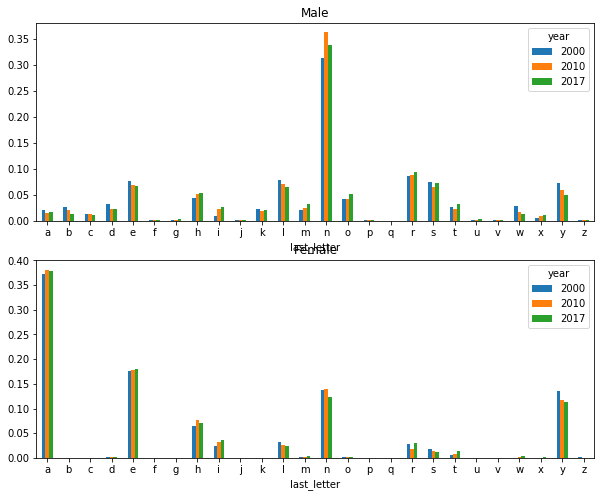

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',)

In [38]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]


In [39]:
lesley_like

array(['Leslie', 'Lesly', 'Lesley'], dtype=object)

In [40]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [41]:
filtered.groupby('name').births.sum()

name
Lesley     3644
Leslie    39613
Lesly      9318
Name: births, dtype: int64